<a href="https://colab.research.google.com/github/buzzaggwd/ML/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт библиотек и обработка дф

In [3]:
!pip install pandas scikit-learn seaborn scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/heart_disease.csv')

df['sex'] = df['sex'].astype('category')

y = df['age'] # Выбираем целевую переменную (категориальную)
X = df.drop('age', axis=1) # Переменные для проверки влияния

In [5]:
y

,age
0,70
1,67
2,57
3,64
4,74
...,...
265,52
266,44
267,56
268,57


In [6]:
X

,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [7]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # Собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [8]:
X

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


In [9]:
df_corr_test = X.copy()

df_corr_test['y'] = y
df_corr_test

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1,y
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True,70
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False,67
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True,57
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True,64
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True,52
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True,44
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False,56
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True,57


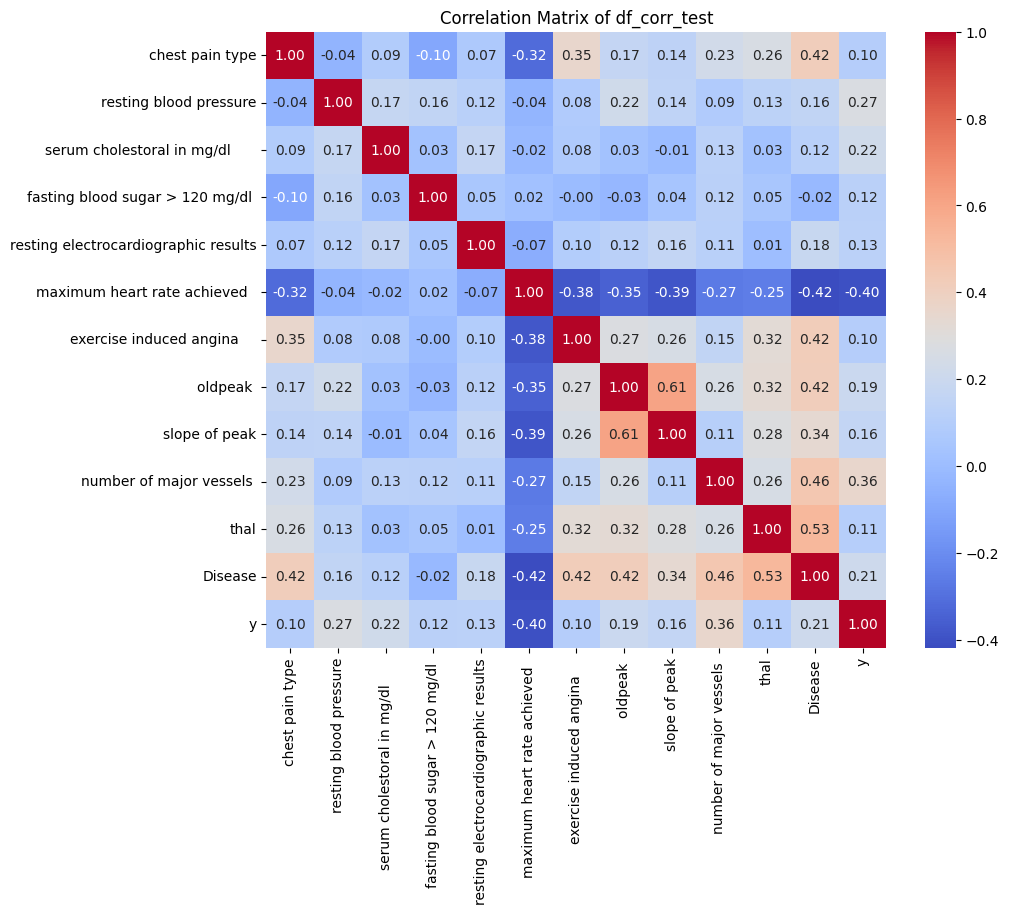

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [12]:
resolve_regression(X, y)
None


Regularization: None
Mean Absolute Error (MAE): 6.63
Mean Squared Error (MSE): 65.87
R^2 Score: 0.17


Почему??

In [13]:
resolve_regression(X[['chest pain type', 'slope of peak', 'Disease']], y)
None


Regularization: None
Mean Absolute Error (MAE): 7.15
Mean Squared Error (MSE): 77.77
R^2 Score: 0.02


Ужасно...

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chest pain type                       270 non-null    int64  
 1   resting blood pressure                270 non-null    int64  
 2   serum cholestoral in mg/dl            270 non-null    int64  
 3   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 4   resting electrocardiographic results  270 non-null    int64  
 5   maximum heart rate achieved           270 non-null    int64  
 6   exercise induced angina               270 non-null    int64  
 7   oldpeak                               270 non-null    float64
 8   slope of peak                         270 non-null    int64  
 9   number of major vessels               270 non-null    int64  
 10  thal                                  270 non-null    int64  
 11  Disease            

### Отбор признаков по корреляции

In [15]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [17]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [18]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 6.38
Mean Squared Error (MSE): 59.25
R^2 Score: 0.25


Чуть-чуть лцчшк

In [19]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


💀💀💀

Regularization: None
Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


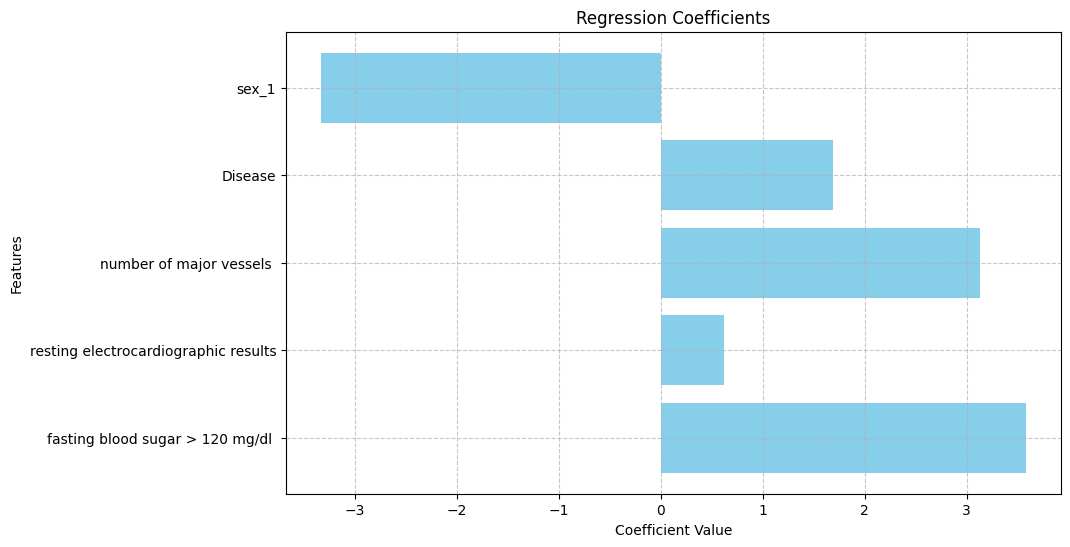

In [20]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [21]:
X_selected_rfe

,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,number of major vessels,Disease,sex_1
0,0,2,3,1,True
1,0,2,0,0,False
2,0,0,0,1,True
3,0,0,1,0,True
4,0,2,1,0,False
...,...,...,...,...,...
265,1,0,0,0,True
266,0,0,0,0,True
267,0,2,0,0,False
268,0,0,0,0,True


In [22]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


ValueError: at least one array or dtype is required

In [ ]:
X_selected_rfe

In [ ]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


### Чуть-чуть про метрики

In [23]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


### Резуляризация

In [24]:
X

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

In [25]:
resolve_regression(X, y, regularization='l1')
None


Regularization: l1
Mean Absolute Error (MAE): 6.24
Mean Squared Error (MSE): 59.13
R^2 Score: 0.26


In [26]:
resolve_regression(X, y, regularization='l2')
None


Regularization: l2
Mean Absolute Error (MAE): 6.61
Mean Squared Error (MSE): 65.56
R^2 Score: 0.18


In [27]:
resolve_regression(X, y, regularization=None)
None


Regularization: None
Mean Absolute Error (MAE): 6.63
Mean Squared Error (MSE): 65.87
R^2 Score: 0.17


### KNeighborsRegress

Алгоритм KNeighborsRegressor делает предсказания для нового объекта, основываясь на информации о его k-ближайших соседях из обучающей выборки. Он ищет K наиболее близких точек данных в пространстве признаков и вычисляет предсказание как среднее значение целевой переменной этих точек.

#### Шаги работы алгоритма
1. Обучение: На этапе обучения алгоритм просто запоминает данные. Он не строит явную модель, а хранит набор обучающих примеров.

2. Предсказание: Для нового объекта (точки данных), для которого нужно сделать предсказание, алгоритм находит K ближайших соседей из обучающего набора. Близость определяется с помощью выбранной метрики расстояния, чаще всего используется Евклидово расстояние.
После этого, для предсказания вычисляется среднее значение целевой переменной (или средневзвешенное, если используется взвешенное расстояние) среди ближайших соседей.

3. Реализация предсказания:

$$\hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i$$

, где:

$\hat{y}$ — предсказанное значение для нового объекта,

$y_i$  — значения целевой переменной для ближайших K-соседей.

In [28]:
# Импортируем библиотеку
from sklearn.neighbors import KNeighborsRegressor

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)  # Здесь n_neighbors - количество ближайших соседей (самое классическое во всех статьях это 5, так что возьмем пока 5)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Средняя абсолютная ошибка
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Среднеквадратическая ошибка
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Коэффициент детерминации R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Absolute Error: 6.529629629629628
Mean Squared Error: 74.50148148148148
R^2 Score: 0.06251048625135913


Результат.. Нуу такое, до этого было лучше

### DecisionTreeRegressor

Алгоритм DecisionTreeRegressor строит дерево решений, где каждая вершина дерева представляет собой проверку некоторого условия на одном из признаков, а каждый лист дерева — это предсказанное значение целевой переменной.

#### Шаги работы алгоритма

1. Выбор признака и порога: На каждом шаге выбирается признак и порог, который минимизирует ошибку предсказания. Для регрессии часто используется среднеквадратическая ошибка (MSE):
$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

, где:

$y_i$ — истинное значение для объекта $i$,

$\hat{y}_i$ — предсказанное значение для объекта $i$,

$N$ — количество объектов в подмножестве.

2. Рекурсивное разбиение: Дерево строится рекурсивно, деля данные на подмножества, пока не достигнуты критерии остановки.

3. Предсказание: Для нового объекта проход по дереву приводит к листу, и его значение (среднее по всем объектам в листе) используется как предсказание.

In [29]:
# Библиотека дерева
from sklearn.tree import DecisionTreeRegressor

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Ограничиваем максимальную глубину дерева
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Средняя абсолютная ошибка
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Среднеквадратическая ошибка
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Коэффициент детерминации R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error: 7.302136839195662
Mean Squared Error: 90.70972336057615
R^2 Score: -0.14144595187302644


Ахахахахахахаа чегооо это норм вообще?